# Start here

Run this notebook in your browser using [Binder](https://mybinder.org/v2/gh/flexcompute-readthedocs/tidy3d-docs/readthedocs?labpath=docs%2Fsource%2Fnotebooks%2FStartHere.ipynb).

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
import numpy as np

# import the package and the web API
import tidy3d as td
import tidy3d.web as web

In [2]:
# set up parameters of simulation (length scales are micrometers)
grid_cells_per_wvl = 30
pml = td.PML()
sim_size = (4, 4, 4)
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 12.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)),
    medium=dielectric)

# create source
source = td.UniformCurrentSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Ey')

# create monitor
monitor = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name='fields_on_plane')

# Initialize simulation
sim = td.Simulation(size=sim_size,
    grid_spec = td.GridSpec.auto(min_steps_per_wvl=grid_cells_per_wvl),
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=run_time,
    boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML())
)

In [3]:
print(f'simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells)/1e6)} million cells.')

[09:04:14] INFO     Auto meshing using wavelength 1.0000 defined from sources.                     ]8;id=17493;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=508047;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/components/grid/grid_spec.py#473\473]8;;\

simulation grid is shaped [192, 192, 192] for 7 million cells.


In [4]:
# run the simulation, download the data.
data = web.run(sim, task_name='quickstart', path='data/data.hdf5')

↓ monitor_data.hdf5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 82.2% • 1.6/1.9 MB • 2.2 MB/s • 0:00:01

[09:05:10] INFO     loading SimulationData from data/data.hdf5                                        ]8;id=936174;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=22628;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#397\397]8;;\

In [5]:
# see the log
print(data.log)

Simulation domain Nx, Ny, Nz: [192, 192, 192]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.3014e+06.
Using subpixel averaging: True
Number of time steps: 1.3924e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 2.8750e-17


Compute source modes time (s):     0.0093
Compute monitor modes time (s):    0.0022
Rest of setup time (s):            3.1263

Running solver for 13924 time steps...
- Time step    556 / time 1.60e-14s (  4 % done), field decay: 1.00e+00
- Time step    923 / time 2.65e-14s (  6 % done), field decay: 1.00e+00
- Time step   1113 / time 3.20e-14s (  8 % done), field decay: 9.57e-01
- Time step   1670 / time 4.80e-14s ( 12 % done), field decay: 1.71e-01
- Time step   2227 / time 6.40e-14s ( 16 % done), field decay: 4.05e-02
- Time step   2784 / time 8.00e-14s ( 20 % done), field decay: 1.84e-02
- Time step   3341 / time 9.61e-14s ( 24 % done), field decay: 8.92e-03
- Time step   3898 / time 1.12e-13s ( 28 % done), field decay: 4.22e-03
- Time

           INFO     Auto meshing using wavelength 1.0000 defined from sources.                     ]8;id=224904;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=851832;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/components/grid/grid_spec.py#473\473]8;;\

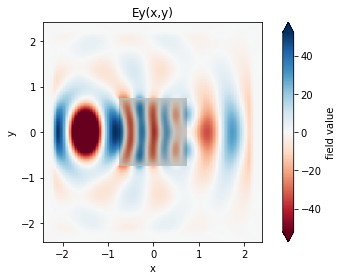

In [6]:
# plot the fields stored in the monitor
ax = data.plot_field('fields_on_plane', 'Ey', z=0)
_ = ax.set_title('Ey(x,y)')